## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  60.134654   283.370689  0.322281  10.736609  0.767781
1  48.865119  1172.189699  0.340180   4.516700  1.635696
2  80.105616   316.848563  0.127392   7.713795  0.566790
3  90.429133  1601.369719  0.374170   5.727197  1.463073
4   5.503783   478.445586  0.682955   7.723424  1.513125


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0198539	total: 58.1ms	remaining: 58.1s
1:	learn: 1.0098122	total: 58.7ms	remaining: 29.3s
2:	learn: 0.9966352	total: 59.3ms	remaining: 19.7s
3:	learn: 0.9840896	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9731524	total: 60.2ms	remaining: 12s
5:	learn: 0.9623268	total: 60.6ms	remaining: 10s
6:	learn: 0.9521274	total: 61.1ms	remaining: 8.67s
7:	learn: 0.9416836	total: 61.7ms	remaining: 7.65s
8:	learn: 0.9320787	total: 62.2ms	remaining: 6.84s
9:	learn: 0.9185233	total: 62.7ms	remaining: 6.21s
10:	learn: 0.9104601	total: 63.3ms	remaining: 5.69s
11:	learn: 0.9013030	total: 63.7ms	remaining: 5.25s
12:	learn: 0.8923838	total: 64.2ms	remaining: 4.88s
13:	learn: 0.8820639	total: 64.6ms	remaining: 4.55s
14:	learn: 0.8719206	total: 65.1ms	remaining: 4.27s
15:	learn: 0.8629997	total: 65.6ms	remaining: 4.03s
16:	learn: 0.8519510	total: 66.1ms	remaining: 3.82s
17:	learn: 0.8443127	total: 66.5ms	remaining: 3.63s
18:	learn: 0.8375694	total: 67.1ms	remaining: 3.

53:	learn: 0.6137825	total: 83.4ms	remaining: 1.46s
54:	learn: 0.6079880	total: 83.9ms	remaining: 1.44s
55:	learn: 0.6019604	total: 84.5ms	remaining: 1.42s
56:	learn: 0.5972436	total: 84.9ms	remaining: 1.41s
57:	learn: 0.5915936	total: 85.3ms	remaining: 1.38s
58:	learn: 0.5864408	total: 85.6ms	remaining: 1.36s
59:	learn: 0.5820624	total: 86.1ms	remaining: 1.35s
60:	learn: 0.5773561	total: 86.4ms	remaining: 1.33s
61:	learn: 0.5724559	total: 86.9ms	remaining: 1.31s
62:	learn: 0.5677855	total: 87.3ms	remaining: 1.3s
63:	learn: 0.5632562	total: 87.7ms	remaining: 1.28s
64:	learn: 0.5589872	total: 88ms	remaining: 1.26s
65:	learn: 0.5548715	total: 88.4ms	remaining: 1.25s
66:	learn: 0.5506340	total: 88.7ms	remaining: 1.24s
67:	learn: 0.5455192	total: 89.1ms	remaining: 1.22s
68:	learn: 0.5406045	total: 89.4ms	remaining: 1.21s
69:	learn: 0.5361375	total: 89.7ms	remaining: 1.19s
70:	learn: 0.5321208	total: 90ms	remaining: 1.18s
71:	learn: 0.5280957	total: 90.6ms	remaining: 1.17s
72:	learn: 0.5244

211:	learn: 0.2539598	total: 155ms	remaining: 576ms
212:	learn: 0.2531770	total: 156ms	remaining: 575ms
213:	learn: 0.2522474	total: 156ms	remaining: 573ms
214:	learn: 0.2511969	total: 157ms	remaining: 572ms
215:	learn: 0.2503743	total: 157ms	remaining: 570ms
216:	learn: 0.2495603	total: 158ms	remaining: 569ms
217:	learn: 0.2486295	total: 158ms	remaining: 567ms
218:	learn: 0.2482149	total: 158ms	remaining: 565ms
219:	learn: 0.2477016	total: 159ms	remaining: 563ms
220:	learn: 0.2473664	total: 159ms	remaining: 561ms
221:	learn: 0.2469719	total: 160ms	remaining: 559ms
222:	learn: 0.2458108	total: 160ms	remaining: 558ms
223:	learn: 0.2447057	total: 161ms	remaining: 556ms
224:	learn: 0.2437825	total: 161ms	remaining: 555ms
225:	learn: 0.2425766	total: 162ms	remaining: 553ms
226:	learn: 0.2413178	total: 162ms	remaining: 551ms
227:	learn: 0.2408221	total: 162ms	remaining: 550ms
228:	learn: 0.2404521	total: 163ms	remaining: 549ms
229:	learn: 0.2398020	total: 163ms	remaining: 547ms
230:	learn: 

457:	learn: 0.1356478	total: 265ms	remaining: 314ms
458:	learn: 0.1354036	total: 266ms	remaining: 313ms
459:	learn: 0.1348989	total: 266ms	remaining: 313ms
460:	learn: 0.1348132	total: 267ms	remaining: 312ms
461:	learn: 0.1344698	total: 267ms	remaining: 311ms
462:	learn: 0.1339864	total: 268ms	remaining: 311ms
463:	learn: 0.1333864	total: 268ms	remaining: 310ms
464:	learn: 0.1328012	total: 269ms	remaining: 309ms
465:	learn: 0.1322306	total: 269ms	remaining: 308ms
466:	learn: 0.1316741	total: 270ms	remaining: 308ms
467:	learn: 0.1311314	total: 270ms	remaining: 307ms
468:	learn: 0.1307947	total: 270ms	remaining: 306ms
469:	learn: 0.1302653	total: 271ms	remaining: 305ms
470:	learn: 0.1297490	total: 271ms	remaining: 305ms
471:	learn: 0.1292455	total: 272ms	remaining: 304ms
472:	learn: 0.1288419	total: 272ms	remaining: 303ms
473:	learn: 0.1283521	total: 273ms	remaining: 303ms
474:	learn: 0.1277642	total: 273ms	remaining: 302ms
475:	learn: 0.1273734	total: 274ms	remaining: 301ms
476:	learn: 

604:	learn: 0.0890301	total: 337ms	remaining: 220ms
605:	learn: 0.0889628	total: 338ms	remaining: 220ms
606:	learn: 0.0888912	total: 338ms	remaining: 219ms
607:	learn: 0.0888248	total: 339ms	remaining: 218ms
608:	learn: 0.0883532	total: 339ms	remaining: 218ms
609:	learn: 0.0882633	total: 340ms	remaining: 217ms
610:	learn: 0.0881985	total: 340ms	remaining: 217ms
611:	learn: 0.0877374	total: 341ms	remaining: 216ms
612:	learn: 0.0876673	total: 341ms	remaining: 215ms
613:	learn: 0.0876041	total: 341ms	remaining: 215ms
614:	learn: 0.0873014	total: 342ms	remaining: 214ms
615:	learn: 0.0872139	total: 342ms	remaining: 213ms
616:	learn: 0.0867639	total: 343ms	remaining: 213ms
617:	learn: 0.0867019	total: 343ms	remaining: 212ms
618:	learn: 0.0866155	total: 343ms	remaining: 211ms
619:	learn: 0.0864036	total: 344ms	remaining: 211ms
620:	learn: 0.0862380	total: 344ms	remaining: 210ms
621:	learn: 0.0861767	total: 345ms	remaining: 210ms
622:	learn: 0.0861098	total: 345ms	remaining: 209ms
623:	learn: 

841:	learn: 0.0520275	total: 448ms	remaining: 84.1ms
842:	learn: 0.0519688	total: 449ms	remaining: 83.6ms
843:	learn: 0.0518651	total: 449ms	remaining: 83.1ms
844:	learn: 0.0518073	total: 450ms	remaining: 82.5ms
845:	learn: 0.0516645	total: 450ms	remaining: 82ms
846:	learn: 0.0516045	total: 451ms	remaining: 81.4ms
847:	learn: 0.0514492	total: 451ms	remaining: 80.9ms
848:	learn: 0.0513927	total: 452ms	remaining: 80.4ms
849:	learn: 0.0513342	total: 452ms	remaining: 79.8ms
850:	learn: 0.0512336	total: 453ms	remaining: 79.3ms
851:	learn: 0.0511495	total: 453ms	remaining: 78.7ms
852:	learn: 0.0509971	total: 453ms	remaining: 78.2ms
853:	learn: 0.0509492	total: 454ms	remaining: 77.6ms
854:	learn: 0.0507947	total: 454ms	remaining: 77.1ms
855:	learn: 0.0505732	total: 455ms	remaining: 76.5ms
856:	learn: 0.0504492	total: 455ms	remaining: 76ms
857:	learn: 0.0503571	total: 456ms	remaining: 75.4ms
858:	learn: 0.0502693	total: 456ms	remaining: 74.9ms
859:	learn: 0.0501788	total: 457ms	remaining: 74.3

997:	learn: 0.0368198	total: 520ms	remaining: 1.04ms
998:	learn: 0.0366864	total: 521ms	remaining: 521us
999:	learn: 0.0365588	total: 521ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

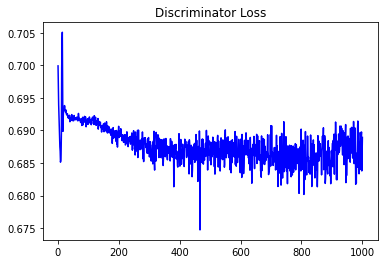

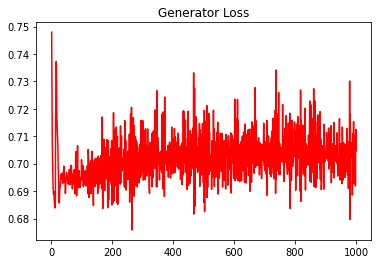

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24877344868044232


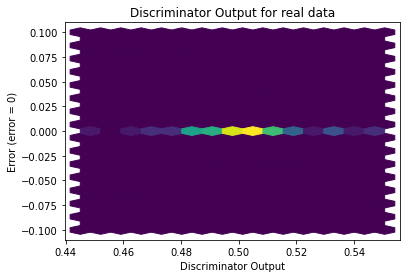

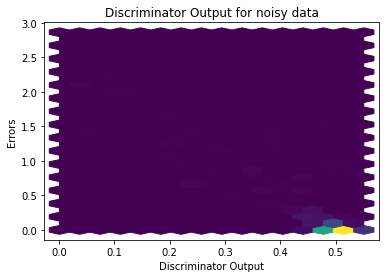

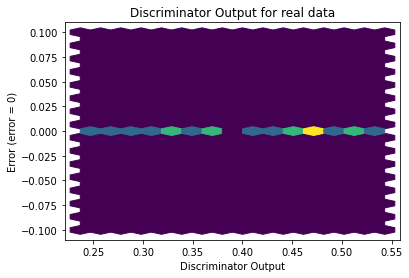

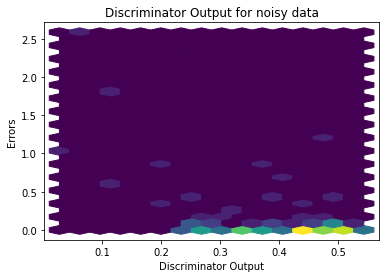

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


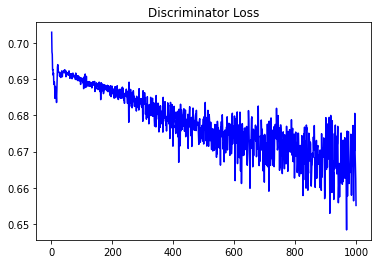

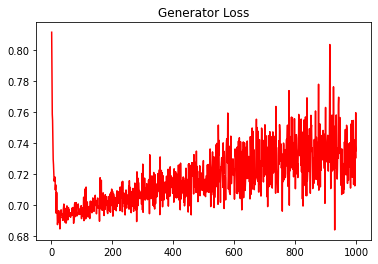

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20813198300358485


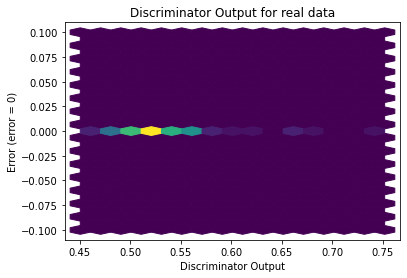

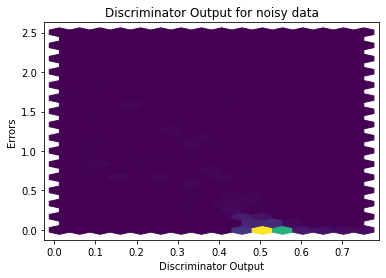

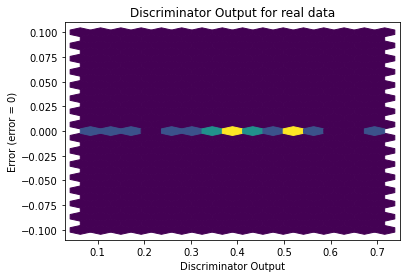

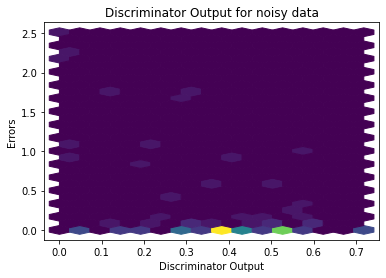

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2611]], requires_grad=True)
